| Changes | Time | Difficulty | 
|---------|------|------------|
|Trying to create naive bayes from scratch but was stuck| 1 hour| 8|
|Cross validation for multinomial naive bayes| 20 mins | 2|
|Trying different training split to improve accuracy. Training split test , left is training and right is test accuracy , 80% = 70% , 90% = 69% , 95% = 80% | 30 mins |3|
|Ignoring stop words like 'The' , 'And' with 80% training and get 76% accuracy| 30 mins | 3 |
|Tried out usiong less training , achieved 82% accuracy but confusion matrix shows that the model were not able to detect positives or good mail | 30 mins | 3|
|Cross validation for Complement naive bayes| 20 mins | 2|
|Switch from MultinomialNB to ComplementNB and get 82% accuracy| 45 mins | 5 |
|Change training split to 85% training and get 84% accuracy with alpha 0.3|15 mins|2|
|Trying new dataset on GaussianNB about wine quality where score > 6.5 is good| 30 mins|3|
|Changing the training split with 90% training and get accuracy of 89%| 20 mins| 2|
|Confusion matrix show the model sometimes predict bad wine as good wine so try out complementNB with cross validation but get lower accuracy| 40 mins| 4|

In [188]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,ComplementNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [189]:
#load data
file_path = 'email_spam.csv'
df = pd.read_csv(file_path)

df['combined_text'] = df['title'] + ' ' + df['text']

X = df['combined_text']
y = df['type']

#splitting the data into training and test
X_train ,X_test ,y_train ,y_test = train_test_split(X, y, test_size=0.15,random_state=42)

tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = ComplementNB(alpha=0.3)

model.fit(X_train_tfidf,y_train)

predictions = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test , predictions)
print(f'Accuracy: {accuracy:.4f}')

print(classification_report(y_test,predictions))

Accuracy: 0.8462
              precision    recall  f1-score   support

    not spam       0.80      1.00      0.89         8
        spam       1.00      0.60      0.75         5

    accuracy                           0.85        13
   macro avg       0.90      0.80      0.82        13
weighted avg       0.88      0.85      0.84        13



In [190]:
model = ComplementNB()
scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring="accuracy")
print(f"Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-validation accuracy: 0.7619 ± 0.1436


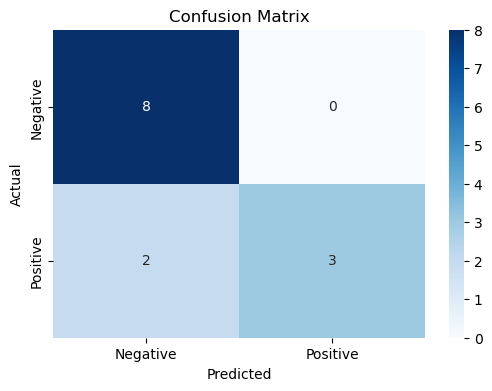

In [191]:
cm = confusion_matrix(y_test,predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [192]:
#load data
file_path = 'wine_data.csv'
df = pd.read_csv(file_path)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [209]:
X = df.iloc[:, :-1]  # exclude quality
y = (df["quality"] > 6.5).astype(int) # if score above 6.5 , its good wine and label with 1 , else 0

#splitting the data into training and test
X_train ,X_test ,y_train ,y_test = train_test_split(X, y, test_size=0.1,random_state=42)

model = GaussianNB()

model.fit(X_train, y_train)

prediction = model.predict(X_test)

accuracy = accuracy_score(y_test , prediction)
print(f'Accuracy: {accuracy:.4f}')

print(classification_report(y_test,prediction))

Accuracy: 0.8938
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       138
           1       0.58      0.82      0.68        22

    accuracy                           0.89       160
   macro avg       0.77      0.86      0.81       160
weighted avg       0.92      0.89      0.90       160



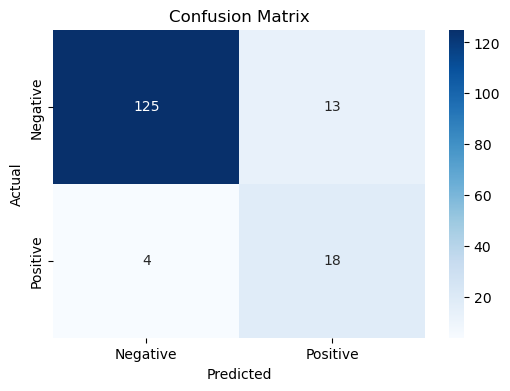

In [211]:
cm = confusion_matrix(y_test,prediction)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [213]:
from sklearn import naive_bayes
import inspect

nb_classes = [cls[0] for cls in inspect.getmembers(naive_bayes, inspect.isclass) if 'NB' in cls[0]]
print(nb_classes)


['BernoulliNB', 'CategoricalNB', 'ComplementNB', 'GaussianNB', 'MultinomialNB', '_BaseDiscreteNB', '_BaseNB']


In [215]:
model = GaussianNB()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print(f"Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-validation accuracy: 0.8443 ± 0.0167
